In [7]:
import sys
import matplotlib.pyplot as plt
import scipy.stats
import math
import numpy as np
import subprocess

In [8]:
# path to the reference pfm, starting from the tools/img/ folder
reference="../../regression/0010_pt/testrender_16spp_fb00.pfm"
# base path to compared images, cutting off before the xxxspp_fb00.pfm part
imgbase="../../regression/0010_pt/testrender_"

# plot title
title="BDPT moll fmo"
# number of compared images, starting at 1spp, up to 2^{steps-1}spp
steps=4

In [9]:
def get_spp(imgfile):
    txt_file = imgfile + ".txt"
    with open(txt_file, "r") as f:
        lines = f.readlines()
        for l in lines:
            if "samples per pixel" in l:
                spp = int(l.split("pixel: ")[1].split(" ")[0])
                return spp

Reference: 16 spp
[1, 2, 4, 8]


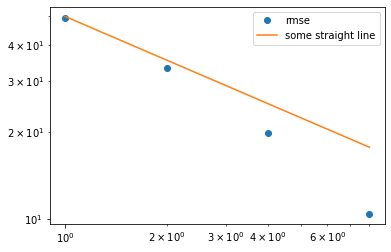

In [10]:
spp = 1
spps = []
rmses = []

print("Reference: " + str(get_spp(reference)) + " spp")

for i in range(0,steps):
    # compute rmse
    image = imgbase + str(spp) + "spp_fb00.pfm"
    process = subprocess.Popen("./pfmdiff " + reference + " " + image, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = lines = process.communicate()
    if (len(error) > 0):
        print("Error:")
        print(error)
        break
    lines = output.splitlines()
    rr = str(lines[0]).split("rmse: ")[1][:-3]
    rmse = float(rr)
    
    # append to list
    spps.append(spp)
    rmses.append(rmse)
    spp = spp*2
    
# plot
print(spps)
plt.loglog(spps, rmses,"o", label="rmse")
fake = [50/math.sqrt(float(s)) for s in spps]
plt.loglog(spps, fake, label="some straight line")
plt.legend()
plt.savefig(imgbase+"rmse.pdf", bbox_inches="tight")